# Data Cleaning

**Imports**

In [68]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

**Loading the Data**

In [69]:
df = pd.read_csv("nba_players_scraped.csv")
df

,Index,Name,Position,High Score,High Rebound,High Assist,High Steal,High Field Goals,High Free Throes,High Three Pointers,...,Pie,Height,Weight,Country,Previous Team,Age,Birthdate,Draft,Experience,Total Awards
0,1,Alaa Abdelnaby,Forward,8,6,1,--,4,1,--,...,--,"6'10"" (2.08m)",240lb (109kg),USA,Duke,--,"June 24, 1968",1990 R1 Pick 25,5 Years,0
1,2,Zaid Abdul-Aziz,Center,22,8,2,--,8,6,--,...,--,"6'9"" (2.06m)",235lb (107kg),USA,Iowa State,--,"April 7, 1946",1968 R1 Pick 5,10 Years,0
2,3,Kareem Abdul-Jabbar,Center,46,26,11,6,20,13,--,...,--,"7'2"" (2.18m)",225lb (102kg),USA,UCLA,--,"April 16, 1947",1969 R1 Pick 1,20 Years,53
3,4,Mahmoud Abdul-Rauf,Guard,23,4,6,1,9,6,3,...,--,"6'1"" (1.85m)",162lb (73kg),USA,Louisiana State,--,"March 9, 1969",1990 R1 Pick 3,9 Years,2
4,5,Tariq Abdul-Wahad,Forward-Guard,16,6,4,3,5,6,--,...,--,"6'6"" (1.98m)",235lb (107kg),France,San Jose State,--,"November 3, 1974",1997 R1 Pick 11,7 Years,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4815,4816,Ante Zizic,Center,4,2,1,--,2,2,--,...,--,"6'10"" (2.08m)",266lb (121kg),Croatia,Darussafaka,--,"January 4, 1997",2016 R1 Pick 23,4 Years,0
4816,4817,Jim Zoet,Center,--,--,--,--,--,--,--,...,--,"7'1"" (2.16m)",240lb (109kg),USA,Kent State,--,"December 30, 1953",Undrafted,1 Year,0
4817,4818,Bill Zopf,Guard,--,--,--,--,--,--,--,...,--,"6'1"" (1.85m)",170lb (77kg),USA,Duquesne,--,"June 7, 1948",1970 R2 Pick 33,1 Year,0
4818,4819,Ivica Zubac,Center,18,16,3,2,8,9,--,...,10.9,"7'0"" (2.13m)",240lb (109kg),Croatia,Mega Basket,26 years,"March 18, 1997",2016 R2 Pick 32,6 Years,0


**Extracting the draft and converting it to Year, Round, and Pick**

In [70]:
def extract_draft(draft_str):
    if draft_str == 'Undrafted':
        return [-1, -1, -1]
    draft_parts = draft_str.split(' ')
    year = int(draft_parts[0])
    if len(draft_parts) == 1:
        round_num = -1
        pick_num = -1
    else:
        round_str = draft_parts[1]
        pick_str = draft_parts[-1]
        if round_str == '':
            round_num = -1
        else:
            round_num = int(round_str[1:])
        if pick_str == '':
            pick_num = -1
        else:
            pick_num = int(pick_str)
    return [year, round_num, pick_num]

**Converting Experience to Years Only (int)**

In [71]:
def experience_to_num(experience):
    if experience == "Rookie":
        return 0
    return int(experience.split(' ')[0])

**Converting Birthdate to Birth year only**

In [72]:
def birthYear(birthdate):
    return int(birthdate.split(',')[1].strip())

**Filling/Removing Missing Values**

In [73]:
### Replacing all'--' with Null value ###
df_new = df.replace("--", None).copy()

# Removing Age and Pie columns
df_new.drop(['Age', 'Pie'], axis = 1, inplace=True)

### Fetching First and Last name ###
df_new['High Score'].fillna(0, inplace = True)
df_new['High Rebound'].fillna(0, inplace = True)
df_new['High Assist'].fillna(0, inplace = True)
df_new['High Steal'].fillna(0, inplace = True)
df_new['High Field Goals'].fillna(0, inplace = True)
df_new['High Free Throes'].fillna(0, inplace = True)
df_new['High Three Pointers'].fillna(0, inplace = True)
df_new['High Block'].fillna(0, inplace = True)

#
df_new.dropna(axis = 0, thresh=23, inplace=True)

###
df_new['Rebound'].fillna(0, inplace = True)
df_new['Height'] = df_new['Height'].str.extract(r'(\d+\.\d+)', expand=False).astype(float)
df_new['Height'].fillna(df_new['Height'].mean(), inplace = True)
df_new['Weight'] = df_new['Weight'].str.extract(r'(\d+)kg', expand=False).astype(float)
df_new['Weight'].fillna(df_new['Weight'].mean(), inplace = True)
df_new['Asists'].fillna(0, inplace = True)


###
df_new.dropna(axis='index', how='any', subset=['Points'], inplace=True)
df_new.Position.fillna('--', inplace=True)
df_new[['Draft Year', 'Draft Round', 'Draft Pick']] = df_new['Draft'].apply(extract_draft).tolist()
df_new.drop(['Draft'], axis=1, inplace=True)


###
df_new['Experience'] = df_new['Experience'].apply(experience_to_num)

###
df_new['Birthdate'] = df_new['Birthdate'].apply(birthYear)


### Converting country to code ###


df_new

,Index,Name,Position,High Score,High Rebound,High Assist,High Steal,High Field Goals,High Free Throes,High Three Pointers,...,Height,Weight,Country,Previous Team,Birthdate,Experience,Total Awards,Draft Year,Draft Round,Draft Pick
0,1,Alaa Abdelnaby,Forward,8,6,1,0,4,1,0,...,2.08,109.0,USA,Duke,1968,5,0,1990,1,25
1,2,Zaid Abdul-Aziz,Center,22,8,2,0,8,6,0,...,2.06,107.0,USA,Iowa State,1946,10,0,1968,1,5
2,3,Kareem Abdul-Jabbar,Center,46,26,11,6,20,13,0,...,2.18,102.0,USA,UCLA,1947,20,53,1969,1,1
3,4,Mahmoud Abdul-Rauf,Guard,23,4,6,1,9,6,3,...,1.85,73.0,USA,Louisiana State,1969,9,2,1990,1,3
4,5,Tariq Abdul-Wahad,Forward-Guard,16,6,4,3,5,6,0,...,1.98,107.0,France,San Jose State,1974,7,0,1997,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4815,4816,Ante Zizic,Center,4,2,1,0,2,2,0,...,2.08,121.0,Croatia,Darussafaka,1997,4,0,2016,1,23
4816,4817,Jim Zoet,Center,0,0,0,0,0,0,0,...,2.16,109.0,USA,Kent State,1953,1,0,-1,-1,-1
4817,4818,Bill Zopf,Guard,0,0,0,0,0,0,0,...,1.85,77.0,USA,Duquesne,1948,1,0,1970,2,33
4818,4819,Ivica Zubac,Center,18,16,3,2,8,9,0,...,2.13,109.0,Croatia,Mega Basket,1997,6,0,2016,2,32


**Remove duplicates**

In [74]:
df_new.drop_duplicates(subset=['Name'], keep='first', inplace=True)
df_new

,Index,Name,Position,High Score,High Rebound,High Assist,High Steal,High Field Goals,High Free Throes,High Three Pointers,...,Height,Weight,Country,Previous Team,Birthdate,Experience,Total Awards,Draft Year,Draft Round,Draft Pick
0,1,Alaa Abdelnaby,Forward,8,6,1,0,4,1,0,...,2.08,109.0,USA,Duke,1968,5,0,1990,1,25
1,2,Zaid Abdul-Aziz,Center,22,8,2,0,8,6,0,...,2.06,107.0,USA,Iowa State,1946,10,0,1968,1,5
2,3,Kareem Abdul-Jabbar,Center,46,26,11,6,20,13,0,...,2.18,102.0,USA,UCLA,1947,20,53,1969,1,1
3,4,Mahmoud Abdul-Rauf,Guard,23,4,6,1,9,6,3,...,1.85,73.0,USA,Louisiana State,1969,9,2,1990,1,3
4,5,Tariq Abdul-Wahad,Forward-Guard,16,6,4,3,5,6,0,...,1.98,107.0,France,San Jose State,1974,7,0,1997,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4815,4816,Ante Zizic,Center,4,2,1,0,2,2,0,...,2.08,121.0,Croatia,Darussafaka,1997,4,0,2016,1,23
4816,4817,Jim Zoet,Center,0,0,0,0,0,0,0,...,2.16,109.0,USA,Kent State,1953,1,0,-1,-1,-1
4817,4818,Bill Zopf,Guard,0,0,0,0,0,0,0,...,1.85,77.0,USA,Duquesne,1948,1,0,1970,2,33
4818,4819,Ivica Zubac,Center,18,16,3,2,8,9,0,...,2.13,109.0,Croatia,Mega Basket,1997,6,0,2016,2,32


**List of country codes**

USA: 63 | France: 25 | Spain: 67 | Nigeria: 49 | New Zealand: 44 | South Sudan: 61 | Trinidad and Tobago: 69 | Turkey: 70 | Canada: 11 | United Kingdom: 75 | Australia: 3 | Greece: 24 | Macedonia: 38 | Brazil: 7 | Scotland: 64 | Puerto Rico: 53 | Israel: 33 | Bahamas: 5 | Croatia: 13 | Italy: 35 | China: 10 | Uruguay: 74 | Russia: 55 | US Virgin Islands: 72 | Latvia: 36 | Georgia: 23 | DRC: 16 | Serbia: 66 | Sudan: 62 | Argentina: 1 | Ukraine: 71 | Germany: 21 | Cuba: 14 | Saint Lucia: 60 | Slovenia: 68 | Norway: 48 | Ireland: 32 | Switzerland: 65 | Haiti: 29 | Dominican Republic: 17 | Guinea: 26 | Mali: 40 | Senegal: 59 | Netherlands: 46 | Cameroon: 9 | Jamaica: 34 | Congo: 12 | Angola: 0 | Panama: 50 | St. Vincent & Grenadines: 58 | Bulgaria: 6 | Poland: 52 | Mexico: 42 | South Korea: 57 | Japan: 37 | Iran: 31 | Democratic Republic of the Congo: 15 | Lithuania: 41 | Sweden: 63 | Czech Republic: 18 | Gabon: 20 | Denmark: 19 | Finland: 27 | Belgium: 4 | Tunisia: 73 | Montenegro: 43 | Romania: 56 | Bosnia and Herzegovina: 8 | Estonia: 22 | Egypt: 28 | Belize: 2 | Antigua and Barbuda: 70 | Austria: 2 | Portugal: 54 | Cabo Verde: 69 | Tanzania: 72 | Venezuela: 76 

**Converting object columns to int**

In [75]:
df_new['High Score'] = df_new['High Score'].astype('int64')
df_new['High Rebound'] = df_new['High Rebound'].astype('int64')
df_new['High Assist'] = df_new['High Assist'].astype('int64')
df_new['High Steal'] = df_new['High Steal'].astype('int64')
df_new['High Field Goals'] = df_new['High Field Goals'].astype('int64')
df_new['High Free Throes'] = df_new['High Free Throes'].astype('int64')
df_new['High Three Pointers'] = df_new['High Three Pointers'].astype('int64')
df_new['High Block'] = df_new['High Block'].astype('int64')
df_new['Points'] = df_new['Points'].astype('float64')
df_new['Asists'] = df_new['Asists'].astype('float64')
df_new['Rebound'] = df_new['Rebound'].astype('float64')
df_new.drop(['Name'], axis = 1, inplace=True)

**Using Label Encoder**

In [76]:
le = LabelEncoder()
# Fit the encoder on the country column and transform it into numerical values
df_new['Country'] = le.fit_transform(df_new['Country']).astype('int64')
df_new['Previous Team'] = le.fit_transform(df_new['Previous Team']).astype('int64')
df_new['Position'] = le.fit_transform(df_new['Position']).astype('int64')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4526 entries, 0 to 4819
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Index                4526 non-null   int64  
 1   Position             4526 non-null   int64  
 2   High Score           4526 non-null   int64  
 3   High Rebound         4526 non-null   int64  
 4   High Assist          4526 non-null   int64  
 5   High Steal           4526 non-null   int64  
 6   High Field Goals     4526 non-null   int64  
 7   High Free Throes     4526 non-null   int64  
 8   High Three Pointers  4526 non-null   int64  
 9   High Block           4526 non-null   int64  
 10  Total Games          4526 non-null   int64  
 11  Total Points         4526 non-null   int64  
 12  Hall Of Famer        4526 non-null   bool   
 13  Points               4526 non-null   float64
 14  Asists               4526 non-null   float64
 15  Rebound              4526 non-null   float6

In [77]:
df_new.Position.unique()

array([3, 1, 6, 5, 0, 2, 4, 7], dtype=int64)

# Handling <span style="color:darkred">Outliers</span>
* You can see that players with less than 10 games have no chance to get into hall of fame, so we removed them.

Text(0, 0.5, 'Frequency')

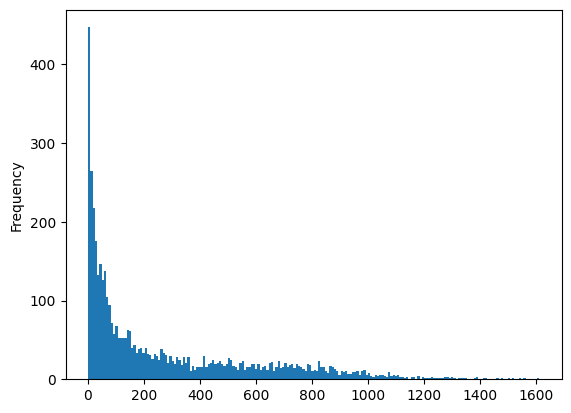

In [78]:
plt.hist(df_new['Total Games'], bins=200)
plt.xlabel=("Games")
plt.ylabel("Frequency")


In [79]:
df_new[df_new['Total Games'] < 10] = np.nan
df_new['Total Games'].describe()

count    4079.000000
mean      309.502084
std       315.315140
min        10.000000
25%        54.000000
50%       177.000000
75%       508.500000
max      1611.000000
Name: Total Games, dtype: float64

In [80]:
df_new.dropna(axis=0, how='all', inplace=True)
df_new

,Index,Position,High Score,High Rebound,High Assist,High Steal,High Field Goals,High Free Throes,High Three Pointers,High Block,...,Height,Weight,Country,Previous Team,Birthdate,Experience,Total Awards,Draft Year,Draft Round,Draft Pick
0,1.0,3.0,8.0,6.0,1.0,0.0,4.0,1.0,0.0,1.0,...,2.08,109.0,72.0,163.0,1968.0,5.0,0.0,1990.0,1.0,25.0
1,2.0,1.0,22.0,8.0,2.0,0.0,8.0,6.0,0.0,2.0,...,2.06,107.0,72.0,263.0,1946.0,10.0,0.0,1968.0,1.0,5.0
2,3.0,1.0,46.0,26.0,11.0,6.0,20.0,13.0,0.0,9.0,...,2.18,102.0,72.0,577.0,1947.0,20.0,53.0,1969.0,1.0,1.0
3,4.0,6.0,23.0,4.0,6.0,1.0,9.0,6.0,3.0,1.0,...,1.85,73.0,72.0,300.0,1969.0,9.0,2.0,1990.0,1.0,3.0
4,5.0,5.0,16.0,6.0,4.0,3.0,5.0,6.0,0.0,1.0,...,1.98,107.0,26.0,472.0,1974.0,7.0,0.0,1997.0,1.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4814,4815.0,3.0,16.0,6.0,1.0,1.0,6.0,4.0,2.0,1.0,...,2.03,103.0,29.0,43.0,1994.0,2.0,0.0,2016.0,2.0,48.0
4815,4816.0,1.0,4.0,2.0,1.0,0.0,2.0,2.0,0.0,1.0,...,2.08,121.0,16.0,144.0,1997.0,4.0,0.0,2016.0,1.0,23.0
4817,4818.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.85,77.0,72.0,164.0,1948.0,1.0,0.0,1970.0,2.0,33.0
4818,4819.0,1.0,18.0,16.0,3.0,2.0,8.0,9.0,0.0,3.0,...,2.13,109.0,16.0,322.0,1997.0,6.0,0.0,2016.0,2.0,32.0


**Saving File**

In [83]:
df_new.to_csv("final_player_data.csv",index=False)